In [73]:
from skimage.io import imread_collection
import numpy as np
from keras.utils import np_utils 
#your path 
_dir = 'original/*.jpg'

#creating a collection with the available images
image = imread_collection(_dir)

In [142]:
image_set = []
for n in image:
    n = cv2.cvtColor(n,cv2.COLOR_RGB2GRAY)
    n = cv2.resize(n,(200,200))
    n = n / 256
    
    image_set.append(n)

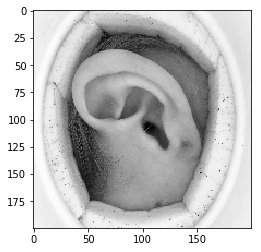

[[0.91015625 0.91015625 0.91015625 ... 0.8984375  0.8984375  0.8984375 ]
 [0.91015625 0.91015625 0.91015625 ... 0.8984375  0.8984375  0.8984375 ]
 [0.91015625 0.92578125 0.91015625 ... 0.8984375  0.8984375  0.8984375 ]
 ...
 [0.92578125 0.92578125 0.92578125 ... 0.91015625 0.91015625 0.91015625]
 [0.92578125 0.92578125 0.92578125 ... 0.91015625 0.91015625 0.91015625]
 [0.92578125 0.92578125 0.91015625 ... 0.91015625 0.91015625 0.91015625]]


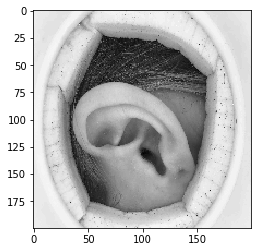

[[0.828125   0.828125   0.81640625 ... 0.81640625 0.81640625 0.81640625]
 [0.828125   0.828125   0.828125   ... 0.81640625 0.828125   0.81640625]
 [0.828125   0.828125   0.828125   ... 0.81640625 0.81640625 0.81640625]
 ...
 [0.828125   0.828125   0.828125   ... 0.828125   0.828125   0.828125  ]
 [0.828125   0.828125   0.828125   ... 0.828125   0.828125   0.828125  ]
 [0.828125   0.828125   0.828125   ... 0.828125   0.828125   0.828125  ]]


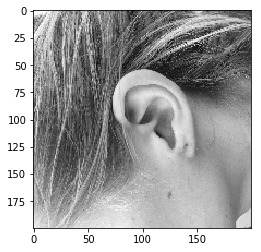

[[0.98828125 0.96484375 0.9921875  ... 0.44921875 0.3203125  0.33984375]
 [0.98046875 0.98046875 0.98046875 ... 0.33203125 0.265625   0.26953125]
 [0.9375     0.98046875 0.9921875  ... 0.296875   0.32421875 0.3203125 ]
 ...
 [0.9375     0.91015625 0.94140625 ... 0.84375    0.84375    0.828125  ]
 [0.9375     0.92578125 0.90625    ... 0.83203125 0.78515625 0.6875    ]
 [0.9375     0.92578125 0.94140625 ... 0.63671875 0.4453125  0.33984375]]


In [143]:
plt.imshow(image_set[1], cmap='gray')
plt.show()
print(image_set[1])
plt.imshow(image_set[2], cmap='gray')
plt.show()
print(image_set[2])

plt.imshow(image_set[3], cmap='gray')
plt.show()
print(image_set[3])




In [144]:
label = np.empty(195*4)
for i in range(195):
    label[i*4:i*4+4] = i
label = label.astype(np.int)
label = np_utils.to_categorical(label, 195)
print(label)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [145]:
train_data = np.empty((390,200,200))  
train_label = np.empty((390,195))   
valid_data = np.empty((195, 200,200))   
valid_label = np.empty((195,195))   
test_data = np.empty((195,200,200))  
test_label = np.empty((195,195)) 

for i in range(195):
        train_data[i * 2:i * 2 + 2] = image_set[i * 4:i * 4 + 2]
        train_label[i * 2:i * 2 + 2] = label[i * 4:i * 4 + 2]
        valid_data[i] = image_set[i * 4 + 2]
        valid_label[i] = label[i * 4 + 2]
        test_data[i] = image_set[i * 4 + 3]
        test_label[i] = label[i * 4 + 3]
data = [(train_data, train_label), (valid_data, valid_label),(test_data, test_label)]

[[0.76953125 0.828125   0.76953125 ... 0.69921875 0.75       0.671875  ]
 [0.72265625 0.76953125 0.9296875  ... 0.75       0.7109375  0.7421875 ]
 [0.72265625 0.75       0.79296875 ... 0.81640625 0.80078125 0.73828125]
 ...
 [0.48828125 0.50390625 0.3671875  ... 0.56640625 0.56640625 0.52734375]
 [0.47265625 0.484375   0.375      ... 0.5703125  0.54296875 0.52734375]
 [0.44921875 0.41796875 0.40234375 ... 0.5546875  0.52734375 0.52734375]]


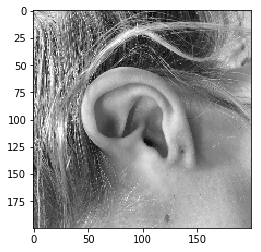

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


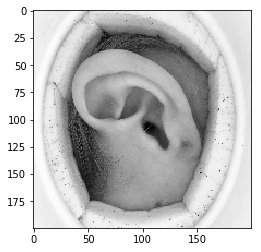

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


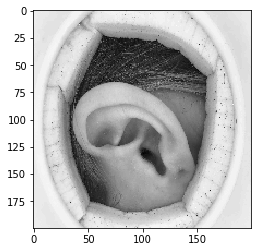

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


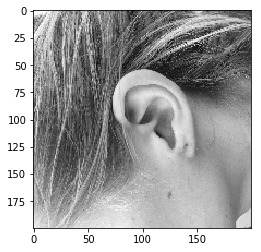

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


In [146]:
print(train_data[0])
plt.imshow(train_data[0], cmap='gray')
plt.show()
print(train_label[0])

plt.imshow(train_data[1], cmap='gray')
plt.show()
print(train_label[1])
plt.imshow(valid_data[0], cmap='gray')
plt.show()
print(valid_label[0])
plt.imshow(test_data[0], cmap='gray')
plt.show()
print(test_label[0])

In [167]:
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from PIL import Image
# 全局变量  
batch_size = 80  # 批处理样本数量
nb_classes = 195  # 分类数目
epochs = 25  # 迭代次数
img_rows, img_cols = 200, 200  # 输入图片样本的宽高
nb_filters = 64  # 卷积核的个数
pool_size = (4, 4)  # 池化层的大小
kernel_size = (10, 10)  # 卷积核的大小
input_shape = (img_rows, img_cols,1)  # 输入图片的维度

[(X_train, Y_train), (X_valid, Y_valid),(X_test, Y_test)] = data

X_train=X_train[:,:,:,np.newaxis]  # 添加一个维度，代表图片通道。这样数据集共4个维度，样本个数、宽度、高度、通道数
X_valid=X_valid[:,:,:,np.newaxis]  # 添加一个维度，代表图片通道。这样数据集共4个维度，样本个数、宽度、高度、通道数
X_test=X_test[:,:,:,np.newaxis]  # 添加一个维度，代表图片通道。这样数据集共4个维度，样本个数、宽度、高度、通道数
print('样本数据集的维度：', X_train.shape,Y_train.shape)
print('测试数据集的维度：', X_test.shape,Y_test.shape)


样本数据集的维度： (390, 200, 200, 1) (390, 195)
测试数据集的维度： (195, 200, 200, 1) (195, 195)


In [168]:
model = Sequential()
model.add(Conv2D(6,kernel_size,input_shape=input_shape,strides=1))  # 卷积层1
model.add(AveragePooling2D(pool_size=pool_size,strides=2))  # 池化层
model.add(Conv2D(12,kernel_size,strides=1))  # 卷积层2
model.add(AveragePooling2D(pool_size=pool_size,strides=2))  # 池化层
model.add(Flatten())  # 拉成一维数据
model.add(Dense(nb_classes))  # 全连接层2
model.add(Activation('sigmoid'))  # sigmoid评分

# 编译模型
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])
# 训练模型
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(X_valid, Y_valid))
# 评估模型
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])



y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)   # 获取概率最大的分类，获取每行最大值所在的列
for i in range(len(y_pred)):
#     oneimg = X_test[i,:,:,0]*256
#     im = Image.fromarray(oneimg)
#     im.show()
    print('第%d个人识别为第%d个人'%(i,y_pred[i]))

Train on 390 samples, validate on 195 samples
Epoch 1/60
390/390 [==============================] - 13s 32ms/step - loss: 5.3667 - acc: 0.0051 - val_loss: 5.6582 - val_acc: 0.0051
Epoch 2/60
390/390 [==============================] - 12s 31ms/step - loss: 5.3588 - acc: 0.0179 - val_loss: 5.3171 - val_acc: 0.0103
Epoch 3/60
390/390 [==============================] - 13s 32ms/step - loss: 5.2429 - acc: 0.0410 - val_loss: 5.2992 - val_acc: 0.0154
Epoch 4/60
390/390 [==============================] - 12s 32ms/step - loss: 5.1867 - acc: 0.0692 - val_loss: 5.2794 - val_acc: 0.0205
Epoch 5/60
390/390 [==============================] - 13s 32ms/step - loss: 5.0990 - acc: 0.1179 - val_loss: 5.3151 - val_acc: 0.0051
Epoch 6/60
390/390 [==============================] - 12s 32ms/step - loss: 4.9204 - acc: 0.3051 - val_loss: 5.0992 - val_acc: 0.0872
Epoch 7/60
390/390 [==============================] - 13s 34ms/step - loss: 4.6142 - acc: 0.3795 - val_loss: 4.9899 - val_acc: 0.0872
Epoch 8/60
390/3

KeyboardInterrupt: 

(200, 200)


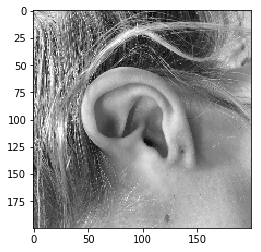

In [53]:
import cv2
import matplotlib.pyplot as plt
image = set1[0]
print(set1[0].shape)

# plt.imshow(image)
# plt.show()

plt.imshow(image, cmap='gray')
plt.show()

In [4]:
print(image.shape)

(3024, 4032)


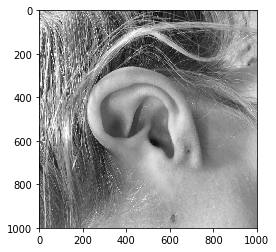

[[173 179 179 ... 181 183 183]
 [204 177 189 ... 176 184 184]
 [227 204 197 ... 172 171 171]
 ...
 [110  92 115 ... 135 143 140]
 [ 98  86 123 ... 135 139 144]
 [ 99  98 133 ... 135 134 149]]
(1000, 1000)


In [5]:
resized_image = cv2.resize(image, (1000,1000 ))
plt.imshow(resized_image, cmap='gray')
plt.show()
print(resized_image)
print(resized_image.shape)

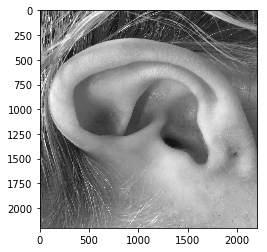

[[122 124 126 ...  87  87  87]
 [128 130 133 ...  84  84  84]
 [135 137 139 ...  81  81  81]
 ...
 [122 126 133 ... 188 188 188]
 [126 130 136 ... 188 188 188]
 [129 133 139 ... 188 188 188]]
(2200, 2200)


In [16]:
crop_img = image[500:2700,800:3000]
plt.imshow(crop_img, cmap='gray')
plt.show()
print(crop_img)
print(crop_img.shape)


In [17]:
for ear in train_x1:
    ear = cv2.cvtColor(ear,cv2.COLOR_RGB2GRAY)

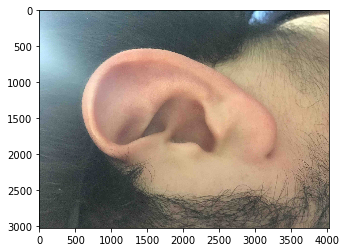

(3024, 4032, 3)


In [19]:
plt.imshow(train_x1[145],cmap = 'gray')
plt.show()
print(train_x1[145].shape)